In [1]:
import sys
sys.path.append('../')
from pathlib import Path
import json
import numpy as np

from ue4nlp.ue_scores import sampled_max_prob, bald

In [2]:
seeds = [4837, 42, 705525, 23419, 1084218, 10671619]

# def extract_scores(res_path_btnk, res_path_lora, res_path_no_adp):
#     preds_btnk = []
#     preds_lora = []
#     preds_no_adp = []

#     for seed in seeds:
#         for res_path, preds_list in [(res_path_btnk, preds_btnk),
#                                      (res_path_lora, preds_lora),
#                                      (res_path_no_adp, preds_no_adp)]:
#             with open(Path(res_path) / str(seed) / 'dev_inference.json') as f:
#                 model_outputs = json.load(f)
#             preds_list.append(model_outputs['sampled_probabilities'])

#     avg_preds_btnk = np.mean(preds_btnk, axis=0)
#     avg_preds_lora = np.mean(preds_lora, axis=0)
#     avg_preds_no_adp = np.mean(preds_no_adp, axis=0)

#     return avg_preds_btnk, avg_preds_lora, avg_preds_no_adp

def extract_scores(*res_paths):
    preds = [[] for _ in range(len(res_paths))]

    for seed in seeds:
        for i, res_path in enumerate(res_paths):
            with open(Path(res_path) / str(seed) / 'dev_inference.json') as f:
                model_outputs = json.load(f)
            preds[i].append(model_outputs['sampled_probabilities'])

    avg_preds = [np.mean(pred, axis=0) for pred in preds]
    return avg_preds

# DeBERTa

In [3]:
res_path_btnk = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_BTLNK_PF/deberta_metric_no_sn/cola/0.0/mc_all/results')
res_path_lora = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_LORA/deberta_metric_no_sn/cola/0.0/mc_all/results')
res_path_no_adp = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_NO_ADP/deberta_metric_no_sn/cola/0.0/mc_all/results')

avg_preds_btnk_deberta, avg_preds_lora_deberta, avg_preds_no_adp_deberta = extract_scores(res_path_btnk, 
                                                                                          res_path_lora, 
                                                                                          res_path_no_adp)

In [4]:
bald_scores_btnk_deberta = bald(avg_preds_btnk_deberta.transpose(1, 0, 2))
bald_scores_lora_deberta = bald(avg_preds_lora_deberta.transpose(1, 0, 2))
bald_scores_no_adp_deberta = bald(avg_preds_no_adp_deberta.transpose(1, 0, 2))

smp_scores_btnk_deberta = sampled_max_prob(avg_preds_btnk_deberta.transpose(1, 0, 2))
smp_scores_lora_deberta = sampled_max_prob(avg_preds_lora_deberta.transpose(1, 0, 2))
smp_scores_no_adp_deberta = sampled_max_prob(avg_preds_no_adp_deberta.transpose(1, 0, 2))

# BALD scores

In [5]:
from scipy.stats import pearsonr

print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(bald_scores_btnk_deberta, bald_scores_no_adp_deberta).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(bald_scores_lora_deberta, bald_scores_no_adp_deberta).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.64
Pearson coeff: LoRA: 0.624


In [6]:
from scipy.stats import spearmanr

print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(bald_scores_btnk_deberta, bald_scores_no_adp_deberta).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(bald_scores_lora_deberta, bald_scores_no_adp_deberta).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.752
Spearman coeff: LoRA: 0.713


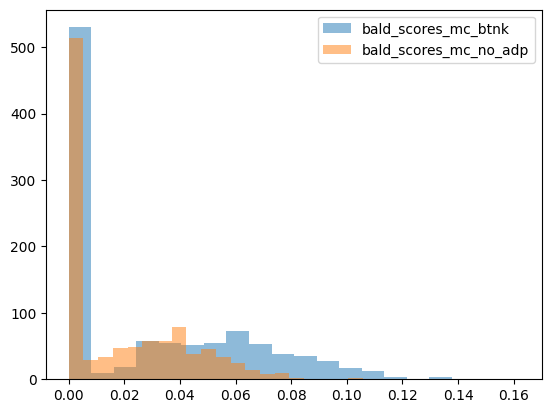

In [7]:
import matplotlib.pyplot as plt

plt.hist(bald_scores_btnk_deberta, bins=20, alpha=0.5, label='bald_scores_mc_btnk')
plt.hist(bald_scores_no_adp_deberta, bins=20, alpha=0.5, label='bald_scores_mc_no_adp')
plt.legend()
plt.show()

# Sampled max prob scores

In [18]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(smp_scores_btnk_deberta, smp_scores_no_adp_deberta).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(smp_scores_lora_deberta, smp_scores_no_adp_deberta).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.621
Pearson coeff: LoRA: 0.654


In [9]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(smp_scores_btnk_deberta, smp_scores_no_adp_deberta).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(smp_scores_lora_deberta, smp_scores_no_adp_deberta).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.818
Spearman coeff: LoRA: 0.8


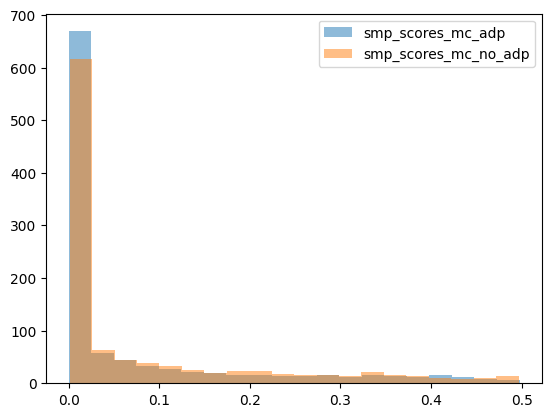

In [10]:
plt.hist(smp_scores_btnk_deberta, bins=20, alpha=0.5, label='smp_scores_mc_adp')
plt.hist(smp_scores_no_adp_deberta, bins=20, alpha=0.5, label='smp_scores_mc_no_adp')
plt.legend()
plt.show()

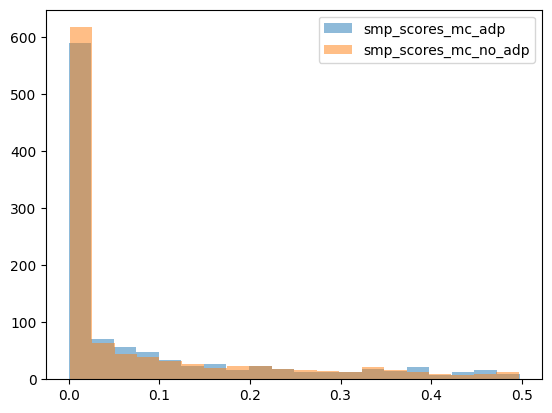

In [11]:
plt.hist(smp_scores_lora_deberta, bins=20, alpha=0.5, label='smp_scores_mc_adp')
plt.hist(smp_scores_no_adp_deberta, bins=20, alpha=0.5, label='smp_scores_mc_no_adp')
plt.legend()
plt.show()

# BERT

In [12]:
res_path_btnk = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_bert_pfeiffer/bert/cola/0.0/mc_all/results')
res_path_lora = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_bert_lora/bert/cola/0.0/mc_all/results')
res_path_no_adp = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_BERT_NO_ADP/bert/cola/0.0/mc_all/results')

In [13]:
avg_preds_btnk_bert, avg_preds_lora_bert, avg_preds_no_adp_bert = extract_scores(res_path_btnk, 
                                                                                 res_path_lora, 
                                                                                 res_path_no_adp)

In [14]:
bald_scores_btnk_bert = bald(avg_preds_btnk_bert.transpose(1, 0, 2))
bald_scores_lora_bert = bald(avg_preds_lora_bert.transpose(1, 0, 2))
bald_scores_no_adp_bert = bald(avg_preds_no_adp_bert.transpose(1, 0, 2))

smp_scores_btnk_bert = sampled_max_prob(avg_preds_btnk_bert.transpose(1, 0, 2))
smp_scores_lora_bert = sampled_max_prob(avg_preds_lora_bert.transpose(1, 0, 2))
smp_scores_no_adp_bert = sampled_max_prob(avg_preds_no_adp_bert.transpose(1, 0, 2))

# BALD scores

In [15]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(bald_scores_btnk_bert, bald_scores_no_adp_bert).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(bald_scores_lora_bert, bald_scores_no_adp_bert).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.741
Pearson coeff: LoRA: 0.646


In [16]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(bald_scores_btnk_bert, bald_scores_no_adp_bert).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(bald_scores_lora_bert, bald_scores_no_adp_bert).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.8
Spearman coeff: LoRA: 0.735


# BALD scores BERT vs DeBERTa

In [17]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(bald_scores_btnk_bert, bald_scores_btnk_deberta).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(bald_scores_lora_bert, bald_scores_lora_deberta).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.553
Pearson coeff: LoRA: 0.528


In [21]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(bald_scores_btnk_bert, bald_scores_btnk_deberta).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(bald_scores_lora_bert, bald_scores_lora_deberta).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.668
Spearman coeff: LoRA: 0.593


# Sampled max prob scores

In [19]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(smp_scores_btnk_bert, smp_scores_no_adp_bert).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(smp_scores_lora_bert, smp_scores_no_adp_bert).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.727
Pearson coeff: LoRA: 0.684


In [20]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(smp_scores_btnk_bert, smp_scores_no_adp_bert).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(smp_scores_lora_bert, smp_scores_no_adp_bert).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.849
Spearman coeff: LoRA: 0.802


# Sampled max prob scores BERT vs DeBERTa

In [23]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(smp_scores_btnk_bert, smp_scores_btnk_deberta).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(smp_scores_lora_bert, smp_scores_lora_deberta).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.468
Pearson coeff: LoRA: 0.5


In [24]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(smp_scores_btnk_bert, smp_scores_btnk_deberta).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(smp_scores_lora_bert, smp_scores_lora_deberta).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.709
Spearman coeff: LoRA: 0.645
